# H$_2$ prototype - energy & rdm1

In [1]:
import pyscf
from pyscf import gto, scf, dft, ao2mo, fci
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [2]:
npoints = 30
R_begin=0.5
R_end=4.5
R = np.linspace(start=R_begin,stop=R_end,num=npoints)

In [3]:
def get_entropy(mf):
    f = mf.get_occ()/2
    #print(f)
    f = f[(f>0) & (f<1)]
    return -2*(f*np.log(f) + (1-f)*np.log(1-f)).sum()

In [4]:
def run_rks(mol_str,smear=False,tau=500,basis='cc-pVTZ'):
    mol = gto.M(atom=mol_str, basis=basis)
    mol.smearing = smear
    mol.tau = tau
    mf = scf.RKS(mol)
    mf.xc='PBE'
    mf.run()
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    rdm1=mf.make_rdm1()
    T = mf.mol.intor_symmetric('int1e_kin')
    Ekin = np.einsum('pq,qp', T, rdm1)
    #print("Ts: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = mf.get_occ()
    #for i in np.arange(h1.shape[0]):
    #    d[i] = h1[i,i]
    return s, mf, Ekin, mf.energy_tot()

In [5]:
def run_fci(mol_str,basis='cc-pVTZ'):
    mol = gto.M(atom=mol_str, basis=basis)
    mf = scf.RHF(mol)
    mf.run()
    norb=np.shape(mf.get_occ())[0]
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    T = mf.mo_coeff.T.dot(mf.mol.intor_symmetric('int1e_kin')).dot(mf.mo_coeff)
    eri = ao2mo.kernel(mol, mf.mo_coeff)
    cisolver = fci.direct_spin1.FCI(mol)
    e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
    rdm1=cisolver.make_rdm1(fcivec=ci,norb=norb,nelec=mol.nelec)
    Ekin = np.einsum('pq,qp', T, rdm1)
    #print("exact T: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = np.zeros(h1.shape[0])
    for i in np.arange(h1.shape[0]):
        #d[i] = h1[i,i]
        s[i] = rdm1[i,i]
    return s, mf, Ekin, e


In [6]:
smear = False
occupations_KS = []
energies_KS = []
calculations_KS = []
Ekin_KS = []
ener_KS = []
for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str, smear=smear)
    occupations_KS.append(s)
    calculations_KS.append(mf)
    Ekin_KS.append(Ekin)
    ener_KS.append(e)

converged SCF energy = -1.09191079551157
converged SCF energy = -1.15570660382185
converged SCF energy = -1.1657707497024
converged SCF energy = -1.15392422250323
converged SCF energy = -1.1333343304918
converged SCF energy = -1.10993548019576
converged SCF energy = -1.08652820559596
converged SCF energy = -1.06444183526048
converged SCF energy = -1.04426556213363
converged SCF energy = -1.02620063047972
converged SCF energy = -1.01024465873264
converged SCF energy = -0.996290770905432
converged SCF energy = -0.984182495193473
converged SCF energy = -0.973742428759461
converged SCF energy = -0.964788200580431
converged SCF energy = -0.957142195582558
converged SCF energy = -0.950637609642804
converged SCF energy = -0.945121950146175
converged SCF energy = -0.940458470065313
converged SCF energy = -0.936525988165003
converged SCF energy = -0.933217859405868
converged SCF energy = -0.930440820434552
converged SCF energy = -0.928113738162466
converged SCF energy = -0.926166646865308
conve

In [14]:
tau = 12000
smear = True
occupations_KS_tau = []
energies_KS_tau = []
calculations_KS_tau = []
Ekin_KS_tau = []
ener_KS_tau = []

for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str,tau=tau,smear=smear)
    occupations_KS_tau.append(s)
    calculations_KS_tau.append(mf)
    if smear:
        mTS=-0.3166808991e-5*tau*get_entropy(mf)
-0.3166808991e-5*tau*    else:
        mTS = 0.0
    print(mTS)
    Ekin_KS_tau.append(Ekin)
    ener_KS_tau.append(e+mTS)

converged SCF energy = -1.09069749044584
-0.0013883885697977072
converged SCF energy = -1.15358251548157
-0.0024681787290067904
converged SCF energy = -1.1620518989959
-0.004405247499487164
converged SCF energy = -1.14754759970862
-0.007736142379291549
converged SCF energy = -1.12288461244686
-0.01305832680285991
converged SCF energy = -1.09393098269501
-0.02074166424848545
converged SCF energy = -1.0639146134419
-0.03063787155672014
converged SCF energy = -1.035049199765
-0.042011468598248045
converged SCF energy = -1.00895992925764
-0.05377555803816149
converged SCF energy = -0.986658564544844
-0.06487629321938611
converged SCF energy = -0.968510840615426
-0.07458241451894153
converged SCF energy = -0.954345930333472
-0.08256613950654995
converged SCF energy = -0.943658894842553
-0.08882652982612337
converged SCF energy = -0.93580791534718
-0.09355871339307557
converged SCF energy = -0.930155223279497
-0.0970383588419693
converged SCF energy = -0.926144129958169
-0.09954541907441669


In [8]:
occupations_FCI = []
energies_FCI = []
calculations_FCI = []
Ekin_FCI = []
ener_FCI = []
for i in np.arange(npoints):
    mol_str = "H 0 0 0; H 0 0 "+str(R[i])
    s, mf, Ekin, e = run_fci(mol_str=mol_str)
    occupations_FCI.append(s)
    calculations_FCI.append(mf)
    Ekin_FCI.append(Ekin)
    ener_FCI.append(e)

converged SCF energy = -1.06330677086093
converged SCF energy = -1.12472263417086
converged SCF energy = -1.13185974071706
converged SCF energy = -1.11665632235809
converged SCF energy = -1.0923609398329
converged SCF energy = -1.06495830542229
converged SCF energy = -1.03728479887597
converged SCF energy = -1.0106982908468
converged SCF energy = -0.985817133884628
converged SCF energy = -0.96287836034824
converged SCF energy = -0.941921705670047
converged SCF energy = -0.922886043676355
converged SCF energy = -0.905661462621326
converged SCF energy = -0.890117054341109
converged SCF energy = -0.876114606717424
converged SCF energy = -0.863515669847535
converged SCF energy = -0.852186417974785
converged SCF energy = -0.842001232519819
converged SCF energy = -0.832844640642622
converged SCF energy = -0.824611746986229
converged SCF energy = -0.8172077952204
converged SCF energy = -0.810547418632858
converged SCF energy = -0.80455383673203
converged SCF energy = -0.799158049919527
conver

In [15]:
occupations_FCI = np.array(occupations_FCI,dtype=np.float)
occupations_KS = np.array(occupations_KS,dtype=np.float)
occupations_KS_tau = np.array(occupations_KS_tau,dtype=np.float)

In [16]:
print(calculations_KS[0].get_occ())
print(calculations_KS_tau[0].get_occ())

[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[1.99769878e+00 2.05294634e-03 2.48182612e-04 3.14201142e-08
 3.14201142e-08 2.44394694e-08 3.77772177e-13 3.49132830e-13
 3.49132830e-13 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


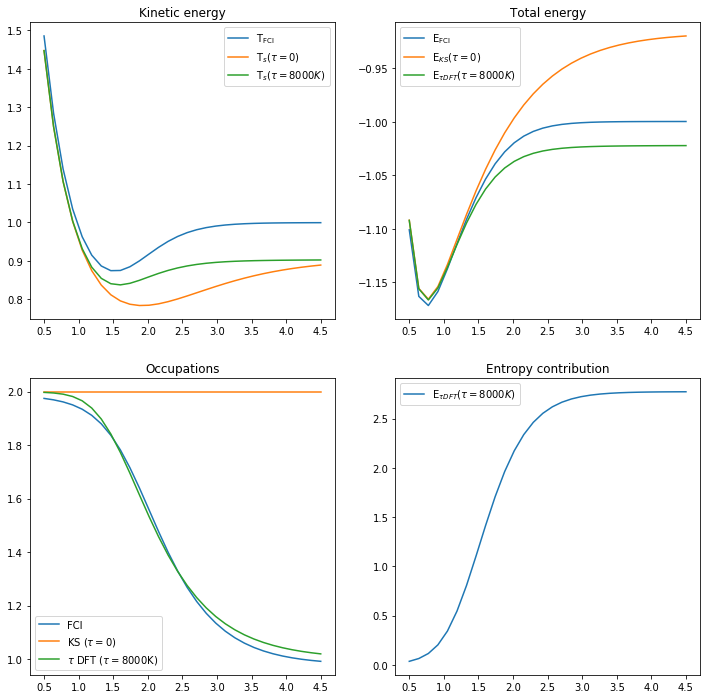

In [20]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
#
ax[0,0].set_title("Kinetic energy")
ax[0,0].plot(R,Ekin_FCI,label=r'T$_\mathrm{FCI}$')
ax[0,0].plot(R,Ekin_KS,label=r'T$_s (\tau=0)$')
ax[0,0].plot(R,Ekin_KS_tau,label=r'T$_s (\tau=8000K)$')
#
ax[0,1].set_title("Total energy")
ax[0,1].plot(R,ener_FCI,label=r'E$_\mathrm{FCI}$')
ax[0,1].plot(R,ener_KS,label=r'E$_{KS} (\tau=0)$')
ax[0,1].plot(R,ener_KS_tau,label=r'E$_{\tau DFT} (\tau=8000K)$')
#
ax[1,0].set_title("Occupations")
ax[1,0].plot(R,occupations_FCI[:,0],label=r'FCI')
ax[1,0].plot(R,occupations_KS[:,0],label=r'KS ($\tau=0$)')
ax[1,0].plot(R,occupations_KS_tau[:,0],label=r'$\tau$ DFT ($\tau=8000$K)')
#
ax[1,1].set_title("Entropy contribution")
entropy = np.zeros(npoints)
for i in range(npoints):
    entropy[i]=  get_entropy(calculations_KS_tau[i])
ax[1,1].plot(R,entropy,label=r'E$_{\tau DFT} (\tau=8000K)$')

for i in 0, 1:
    for j in 0, 1:
        ax[i,j].legend()
plt.show()

# prototyping natural orbitals

In [12]:
SVD = lin.svd

In [13]:
U, s, Vh = SVD(a=rdm1)

NameError: name 'rdm1' is not defined

In [ ]:
h1_natural = np.dot(Vh.T, np.dot(h1, U.T))

In [ ]:
d = np.zeros(h1_natural.shape[0])
s = np.zeros(h1_natural.shape[0])
for i in np.arange(h1_natural.shape[0]):
    d[i] = h1_natural[i,i]
    s[i] = rdm1[i,i]

In [ ]:
plt.scatter(x=d,y=s)
plt.show()